In [1]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('C:/Data_Science/Personal_Notebooks/Fertilizer_classification/train.csv')
data2 = pd.read_csv('C:/Data_Science/Personal_Notebooks/Fertilizer_classification/test.csv')

train_df = data1.copy()
test_df = data2.copy()

print("First 3 rows of train_df: \n", train_df.head(3))
print("First 3 rows of test_df: \n", test_df.head(3))

First 3 rows of train_df: 
    id  Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
0   0           37        70        36    Clayey  Sugarcane        36   
1   1           27        69        65     Sandy    Millets        30   
2   2           29        63        32     Sandy    Millets        24   

   Potassium  Phosphorous Fertilizer Name  
0          4            5           28-28  
1          6           18           28-28  
2         12           16        17-17-17  
First 3 rows of test_df: 
        id  Temparature  Humidity  Moisture Soil Type    Crop Type  Nitrogen  \
0  750000           31        70        52     Sandy        Wheat        34   
1  750001           27        62        45       Red    Sugarcane        30   
2  750002           28        72        28    Clayey  Ground Nuts        14   

   Potassium  Phosphorous  
0         11           24  
1         14           15  
2         15            4  


In [3]:
#function to make the columns snake_case
import re

def to_snake_case(df):
    def convert(name):
        #lower case
        name = name.lower()
        # Replace spaces and hyphens with underscores
        name = re.sub(r'[\s\-]+', '_', name)
        # Add underscore before capital letters (except at the beginning)
        name = re.sub(r'(?<!^)(?=[A-Z])', '_', name)
        # Convert to lowercase
        return name.lower()

    df.columns = [convert(col) for col in df.columns]
    return df

In [4]:
to_snake_case(train_df)
to_snake_case(test_df)

,id,temparature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14
...,...,...,...,...,...,...,...,...,...
249995,999995,26,66,30,Red,Sugarcane,14,7,18
249996,999996,33,62,55,Red,Pulses,28,14,7
249997,999997,36,53,64,Black,Paddy,28,11,27
249998,999998,36,67,26,Clayey,Paddy,33,0,10


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_df['soil_type'] = le.fit_transform(train_df['soil_type'])
train_df['crop_type'] = le.fit_transform(train_df['crop_type'])
train_df['fertilizer_name'] = le.fit_transform(train_df['fertilizer_name'])

In [6]:
id_placeholder = train_df['id']
train_df = train_df.drop(columns='id') #no statistical value

In [7]:
train_df = train_df.rename(columns= {'temparature' : 'temperature'})

In [8]:
train_df['nutrient_index'] = train_df['nitrogen'] + train_df['phosphorous'] + train_df['potassium']
train_df['nutrient_moisture_ration'] = train_df['nutrient_index'] / (train_df['moisture'] + 1e-6)
train_df['climate_stress'] = (train_df['temperature'] - train_df['humidity']) / (train_df['temperature'] +1e-6)
train_df['climate_gap'] = abs(train_df['temperature'] - train_df['humidity'])
train_df['water_retention'] = train_df['moisture'] * train_df['humidity']
train_df['water_stress_index'] = train_df['temperature'] / (train_df['humidity'] + train_df['moisture'] + 1e-6)
train_df['temp_humidity'] = train_df['temperature'] * train_df['humidity']
train_df['temp_moisture'] = train_df['temperature'] * train_df['moisture']
train_df['np_ratio'] = train_df['nitrogen'] / (train_df['phosphorous'] + 1e-6)
train_df['nk_ratio'] = train_df['nitrogen'] / (train_df['potassium'] + 1e-6)
train_df['pk_ratio'] = train_df['phosphorous'] / (train_df['potassium'] + 1e-6)
train_df['total_npk'] = train_df['nitrogen'] + train_df['phosphorous'] + train_df['potassium']
train_df['n_proportion'] = train_df['nitrogen'] / (train_df['total_npk'] + 1e-6)
train_df['p_proportion'] = train_df['potassium'] / (train_df['total_npk'] + 1e-6)
train_df['k_proportion'] = train_df['potassium'] / (train_df['total_npk'] + 1e-6)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_df['soil_type'] = le.fit_transform(train_df['soil_type'])
train_df['crop_type'] = le.fit_transform(train_df['crop_type'])
train_df['fertilizer_name'] = le.fit_transform(train_df['fertilizer_name'])

## Removing features

With this notebook I'm going to remove the features which are less important to the model prediction based on the result of the permutation importance calculated previously.

In [10]:
train_df.columns

Index(['temperature', 'humidity', 'moisture', 'soil_type', 'crop_type',
       'nitrogen', 'potassium', 'phosphorous', 'fertilizer_name',
       'nutrient_index', 'nutrient_moisture_ration', 'climate_stress',
       'climate_gap', 'water_retention', 'water_stress_index', 'temp_humidity',
       'temp_moisture', 'np_ratio', 'nk_ratio', 'pk_ratio', 'total_npk',
       'n_proportion', 'p_proportion', 'k_proportion'],
      dtype='object')

In [11]:
features_remove = ['temperature', 'humidity', 'moisture', 'soil_type', 'crop_type',
       'nitrogen', 'potassium', 'phosphorous',
       'nutrient_index', 'climate_stress',
       'climate_gap', 'pk_ratio', 'total_npk', 'p_proportion', 'k_proportion']

train_df = train_df.drop(columns= features_remove)

In [12]:
fertilizer_placeholder = train_df.pop('fertilizer_name')

train_df['fertilizer_name'] = fertilizer_placeholder

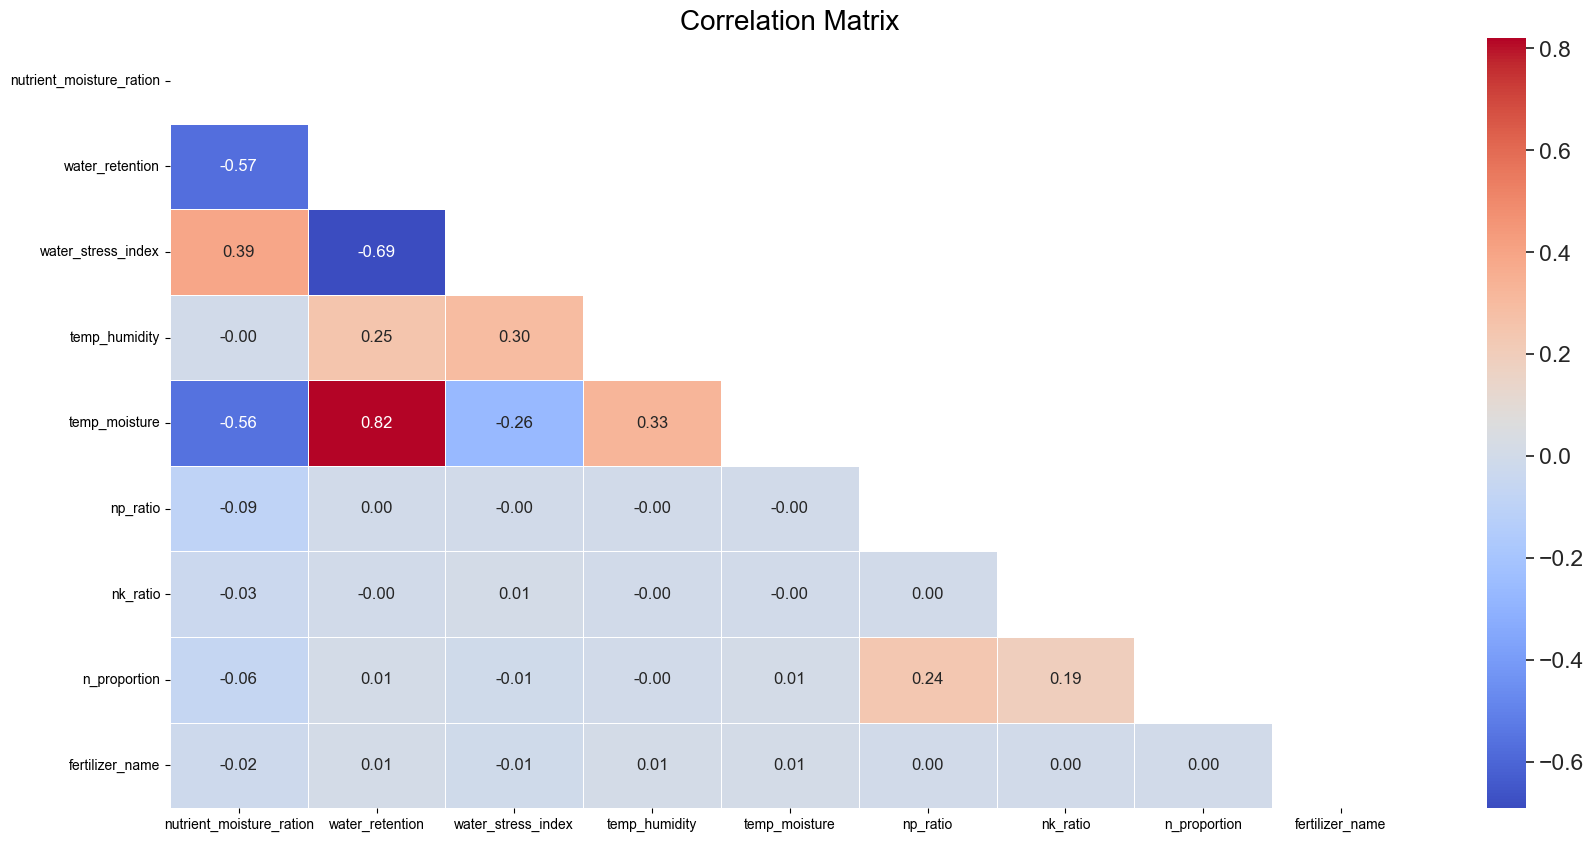

In [13]:
num_corr = round(train_df.corr(), 2)

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set_theme(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Matrix", fontsize=20) # add title
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [15]:
#classification issues
def train_and_eval_models(X_train, X_test, y_train, y_test):

    #models to test
    models = {
        "Logistic Regression" : LogisticRegression(),
        "Random Forest" : RandomForestClassifier(),
        "XGB" : XGBClassifier()
    }

    print("Starting the training process.")

    #list to store results

    results = []

    #scaling data just for LogisticRegression

    for name, model in models.items():
        if name in ['Logistic Regression']:
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            print(f"Features scaled for model {name}")

        print(f"Training model: {name}")

        model.fit(X_train_scaled, y_train)

        y_train_predict = model.predict(X_train_scaled) #to test accuracy on the train dataframe
        y_test_predict = model.predict(X_test_scaled)

        results.append({
            "Model" : name,
            "Train Accuracy" : accuracy_score(y_train, y_train_predict),
            "Test Accuracy" : accuracy_score(y_test, y_test_predict),
            "Train Precision" : precision_score(y_train, y_train_predict, average = 'weighted'),
            "Test Precision" : precision_score(y_test, y_test_predict, average = 'weighted'),
            "Train F1 Score" : f1_score(y_train, y_train_predict, average = 'weighted'),
            "Test F1 Score" : f1_score(y_test, y_test_predict, average = 'weighted')
        })

    #Convering result into a df
    results_df = pd.DataFrame(results)
    print("\n Model Performance Summary: ")
    print(results_df)
    

    return results_df


In [16]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns= 'fertilizer_name')
y = train_df['fertilizer_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [17]:
results_df = train_and_eval_models(X_train, X_test, y_train, y_test)
results_df

Starting the training process.
Features scaled for model Logistic Regression
Training model: Logistic Regression
Training model: Random Forest
Training model: XGB

 Model Performance Summary: 
                 Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Logistic Regression        0.156068       0.154807         0.137028   
1        Random Forest        0.999172       0.156160         0.999172   
2                  XGB        0.242793       0.163847         0.270813   

   Test Precision  Train F1 Score  Test F1 Score  
0        0.134191        0.126118       0.125144  
1        0.154528        0.999172       0.154207  
2        0.161010        0.228275       0.149305  


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train F1 Score,Test F1 Score
0,Logistic Regression,0.156068,0.154807,0.137028,0.134191,0.126118,0.125144
1,Random Forest,0.999172,0.156160,0.999172,0.154528,0.999172,0.154207
2,XGB,0.242793,0.163847,0.270813,0.161010,0.228275,0.149305


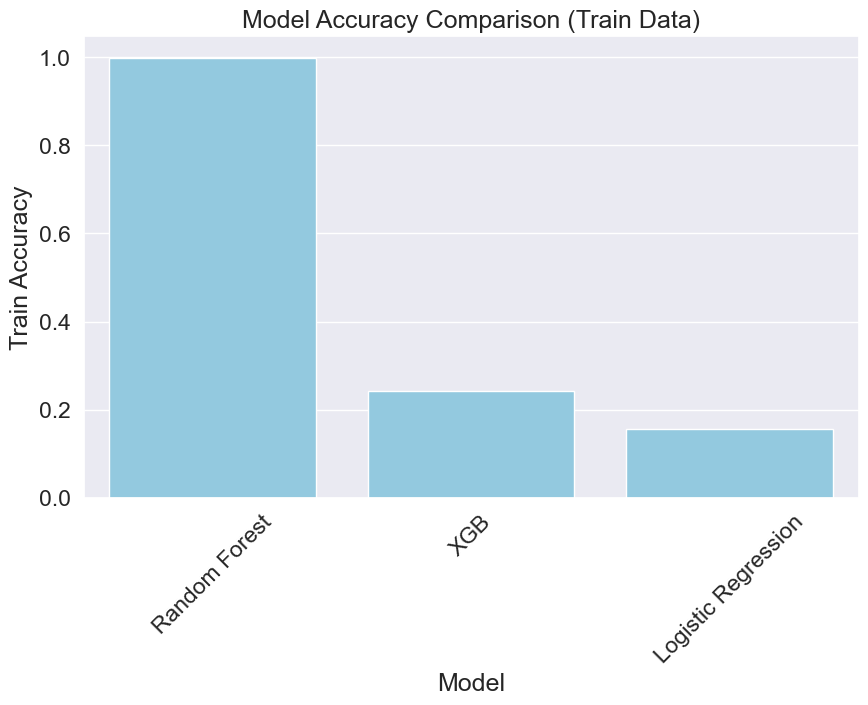

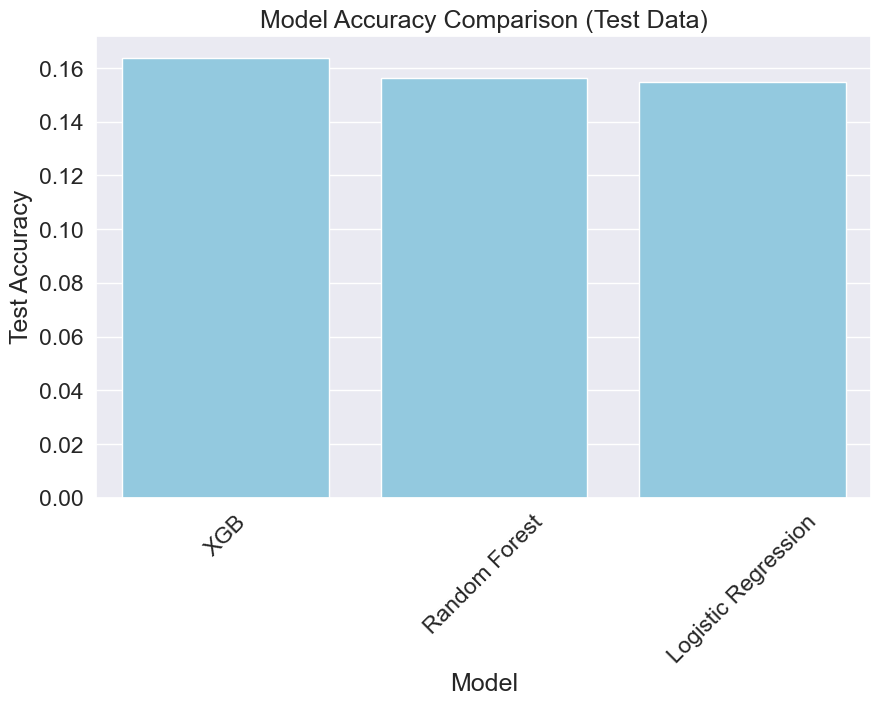

In [22]:
#plotting the results

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Train Accuracy", data=results_df.sort_values(by='Train Accuracy', ascending=False), color='skyblue')
plt.title("Model Accuracy Comparison (Train Data)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Test Accuracy", data=results_df.sort_values(by='Test Accuracy', ascending=False), color='skyblue')
plt.title("Model Accuracy Comparison (Test Data)")
plt.xticks(rotation=45)
plt.show()

## Hyperparameters tuning with GridSearch

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

param_distribution = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [25]:
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

scorer = make_scorer(f1_score, average='weighted')

In [26]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distribution,
    n_iter=20,
    scoring=scorer,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)


print("Random Model best parameters: ", random_search.best_params_)
best_model = random_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Random Model best parameters:  {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


Random Model best parameters:  {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

In [27]:
best_xgb = XGBClassifier(
    subsample=1.0,
    n_estimators=300,
    max_depth=10,
    learning_rate=0.05,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [28]:
y_pred = best_xgb.predict(X_test)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

F1 Score: 0.15206214820361105
